<a href="https://colab.research.google.com/github/byannurcahyo/2241720134-PCVK-2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

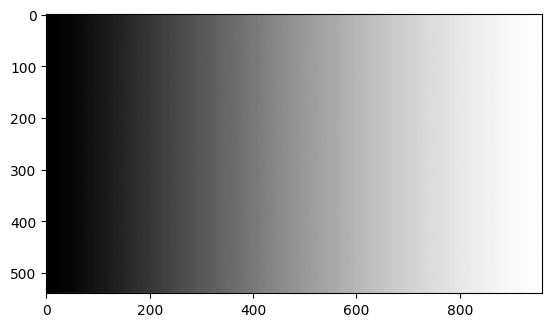

In [24]:
img = cv2.imread('/content/drive/MyDrive/PCVK/gradient.jpg', 0)
plt.imshow(img, cmap='gray')

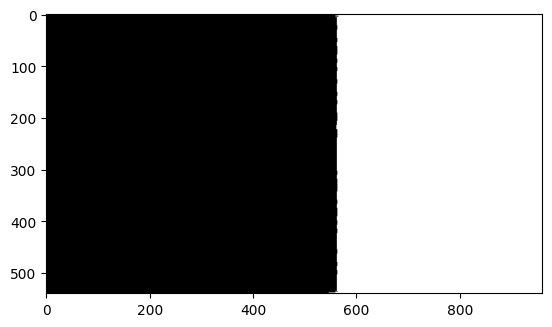

In [28]:
def binary(img,thres):
    img_binary = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > thres:
                img_binary[i,j] = 255
            else:
                img_binary[i,j] = 0
    return img_binary

img_binary = binary(img,170)
plt.imshow(img_binary, cmap='gray')

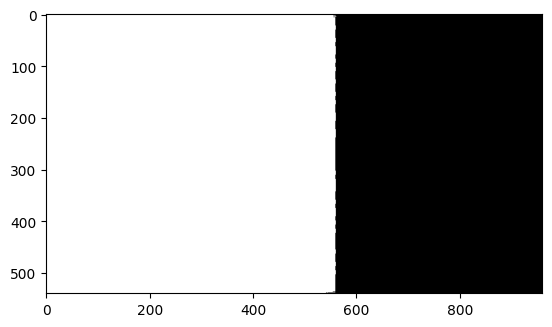

In [30]:
def binaryinv(img,thres):
    img_binaryinv = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] < thres:
                img_binaryinv[i,j] = 255
            else:
                img_binaryinv[i,j] = 0
    return img_binaryinv

img_binaryinv = binaryinv(img,170)
plt.imshow(img_binaryinv, cmap='gray')

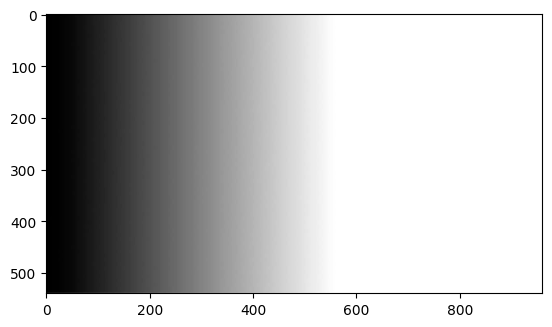

In [32]:
def trunc(img,tresh):
    img_trunc = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > tresh:
                img_trunc[i,j] = tresh
            else:
                img_trunc[i,j] = img[i,j]
    return img_trunc

img_trunc = trunc(img,170)
plt.imshow(img_trunc, cmap='gray')

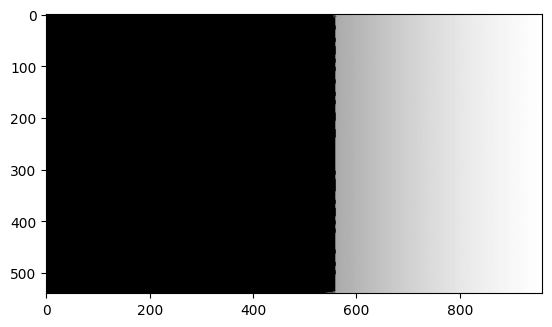

In [33]:
def tozero(img,tresh):
    img_tozero = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] < tresh:
                img_tozero[i,j] = 0
            else:
                img_tozero[i,j] = img[i,j]
    return img_tozero

img_tozero = tozero(img,170)
plt.imshow(img_tozero, cmap='gray')

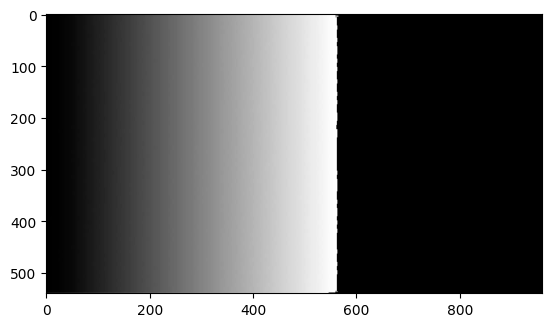

In [34]:
def tozero_inv(img,tresh):
    img_tozero_inv = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > tresh:
                img_tozero_inv[i,j] = 0
            else:
                img_tozero_inv[i,j] = img[i,j]
    return img_tozero_inv

img_tozero_inv = tozero_inv(img,170)
plt.imshow(img_tozero_inv, cmap='gray')

Text(0.5, 1.0, 'Otsu Thresholding')

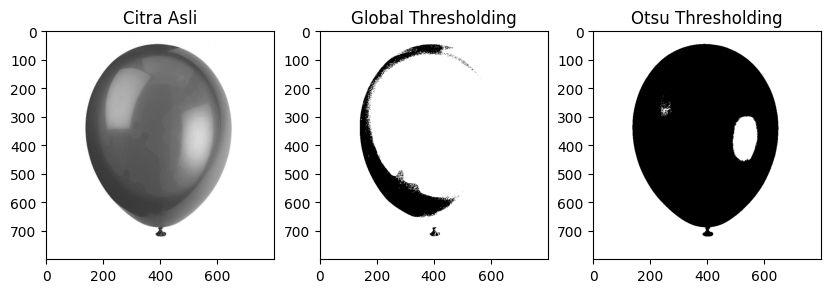

In [38]:
# Import image
image = cv2.imread('/content/drive/MyDrive/PCVK/balloon.jpg', cv2.IMREAD_GRAYSCALE)

def otsu_threshold(image):
    # Menghitung histogram gambar
    histogram, bins = np.histogram(image, bins=256, range=[0, 256])

    # Menghitung probabilitas setiap intensitas piksel
    prob = histogram / np.sum(histogram)

    # Menginisialisasi variabel untuk Otsu Thresholding
    max_variance = 0
    optimal_threshold = 0

    for t in range(256):
        # Probabilitas dua kelas (foreground dan background)
        w0 = np.sum(prob[:t])  # Background
        w1 = np.sum(prob[t:])  # Foreground
        if w0 == 0 or w1 == 0:
            continue
        # Rata-rata dua kelas
        mean0 = np.sum(np.arange(0, t) * prob[:t]) / w0  # Background
        mean1 = np.sum(np.arange(t, 256) * prob[t:]) / w1  # Foreground

        # Variansi antar kelas
        variance_between = w0 * w1 * (mean0 - mean1) ** 2

        # Mencari variansi maksimal
        if variance_between > max_variance:
            max_variance = variance_between
            optimal_threshold = t

    return optimal_threshold

otsu_image = binary(image,otsu_threshold(image))


global_tresh = binary(image,90)
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title('Citra Asli')
plt.subplot(1,3,2)
plt.imshow(global_tresh,cmap='gray')
plt.title('Global Thresholding')
plt.subplot(1,3,3)
plt.imshow(otsu_image,cmap='gray')
plt.title('Otsu Thresholding')

Text(0.5, 1.0, 'Citra Segment')

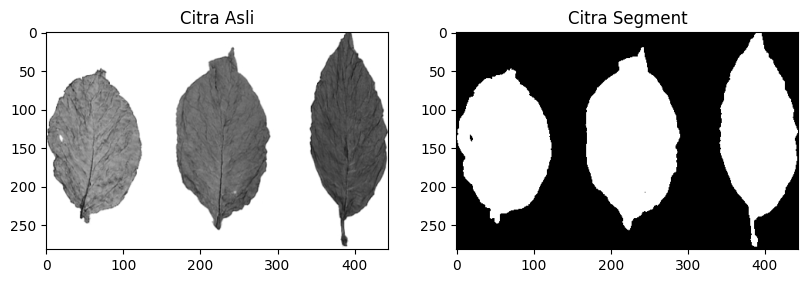

In [53]:
img_tbc_ori = cv2.imread('/content/drive/MyDrive/PCVK/tobacco.jpg')
img_tbc_gray = cv2.cvtColor(img_tbc_ori,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(img_tbc_gray,cmap='gray')
plt.title('Citra Asli')
plt.subplot(1,3,2)
_, img_mask = cv2.threshold(img_tbc_gray,200,255,cv2.THRESH_BINARY_INV)
plt.imshow(img_mask, cmap='gray')
plt.title('Citra Segment')

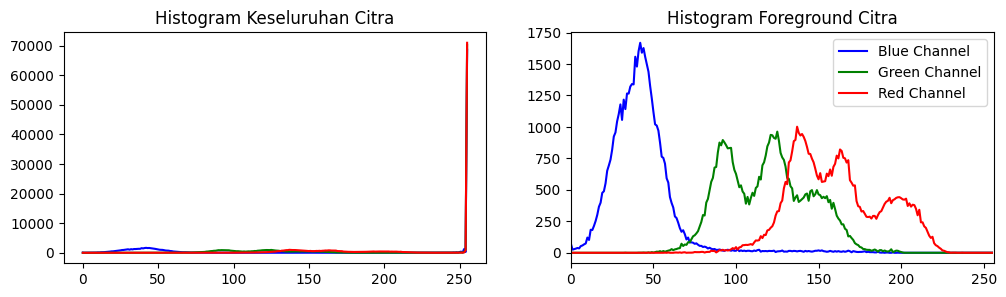

In [62]:
# Pisahkan gambar menjadi channel B, G, R
b, g, r = cv2.split(img_tbc_ori)
# Hitung histogram Ori
hist_ori_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_ori_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_ori_r = cv2.calcHist([r], [0], None, [256], [0, 256])
# Hitung histogram untuk setiap channel dengan menggunakan mask
hist_b = cv2.calcHist([b], [0], img_mask, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], img_mask, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], img_mask, [256], [0, 256])

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title("Histogram Keseluruhan Citra")
plt.plot(hist_ori_b, color='b', label='Blue Channel')   # Histogram channel Biru
plt.plot(hist_ori_g, color='g', label='Green Channel')  # Histogram channel Hijau
plt.plot(hist_ori_r, color='r', label='Red Channel')    # Histogram channel Merah

plt.subplot(1,2,2)
plt.title("Histogram Foreground Citra")
plt.plot(hist_b, color='b', label='Blue Channel')   # Histogram channel Biru
plt.plot(hist_g, color='g', label='Green Channel')  # Histogram channel Hijau
plt.plot(hist_r, color='r', label='Red Channel')    # Histogram channel Merah

# t batas sumbu x dari 0 sampai 256
plt.xlim([0, 256])
# Tambahkan legend agar kita bisa melihat channel mana yang mana
plt.legend()
# Tampilkan plot
plt.show()

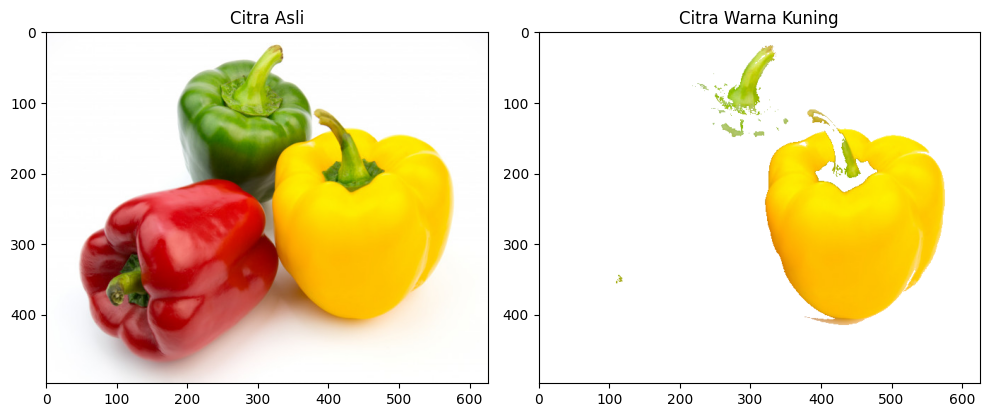

In [77]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/PCVK/peppers.jpg')

# Mengubah citra menjadi dua dimensi untuk K-Means clustering
Z = img.reshape((-1, 3))  # Mengubah menjadi vektor 2D dengan 3 channel warna
Z = np.float32(Z)  # Mengubah tipe data ke float32 untuk K-Means

# K-Means clustering
K = 3  # Kita akan membuat 3 klaster, kamu bisa sesuaikan dengan kebutuhan
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengubah hasil klaster menjadi format gambar
centers = np.uint8(centers)  # Kembalikan pusat klaster ke format uint8 (warna asli)
segmented_img = centers[labels.flatten()]  # Buat gambar dari label yang terklasifikasi
segmented_img = segmented_img.reshape(img.shape)

# Menentukan rentang warna kuning dalam format BGR
# Kamu dapat menyesuaikan batas bawah dan atas sesuai dengan citra kamu
lower_yellow = np.array([0, 180, 180])  # Batas bawah warna kuning (BGR)
upper_yellow = np.array([50, 255, 255])  # Batas atas warna kuning (BGR)

# Masking: pilih hanya area yang sesuai dengan warna kuning
mask = cv2.inRange(segmented_img, lower_yellow, upper_yellow)
result = cv2.bitwise_and(img, img, mask=mask)

# Membuat bagian yang bukan warna kuning menjadi putih
result = img.copy()
result[mask == 0] = [255]

# Menampilkan gambar asli, gambar segmentasi dan hasil masking
plt.figure(figsize=(10,4))

# Gambar Asli
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
# Axis ditampilkan secara default tanpa perlu menyembunyikannya

# Gambar Hanya Warna Kuning
plt.subplot(122)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Citra Warna Kuning')
# Axis ditampilkan secara default tanpa perlu menyembunyikannya

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Citra Otsu Thresholding')

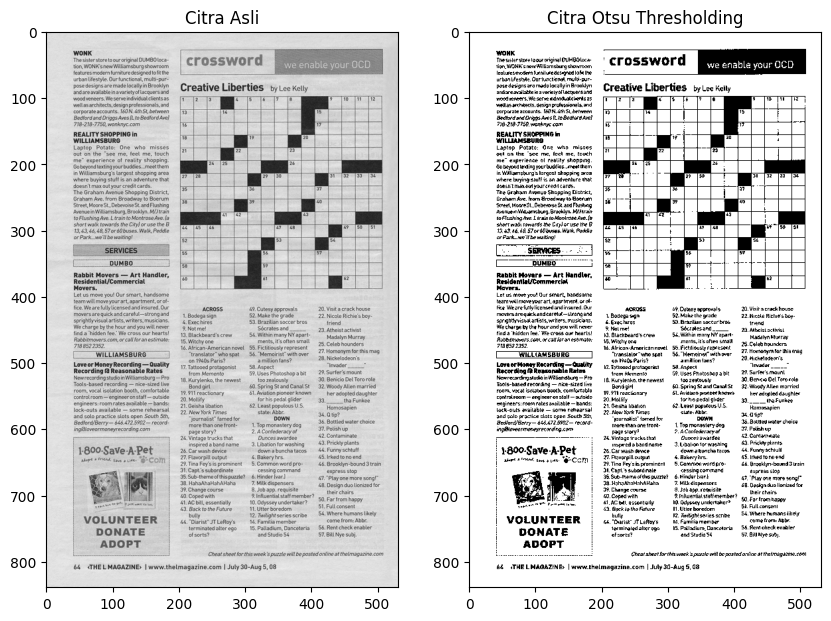

In [84]:
img_crossword = cv2.imread('/content/drive/MyDrive/PCVK/crossword.jpg',0)
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_crossword, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.subplot(122)
res,thres = cv2.threshold(img_crossword,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thres, cmap='gray')
plt.title('Citra Otsu Thresholding')